#### Task Informations
data contains power for multiple ACs at some hotel in Gurgaon.

* Identify patterns/trends in the data?
* Which AC was used the most/least?


Optional (Bonus questions):

* Relate this power data with the outside temperature of Gurgaon? 
* Using the power data, predict/forecast the power consumption?

This problem is open-ended for exploration analysis. Feel free to provide any insights from the data by loading the data using Python Pandas library. The more insights you get, the better.

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
pd.set_option('display.max_rows', 50)

In [3]:
url = "https://drive.google.com/file/d/1VCM8zLekLN8aMCKXnqI0MB57j_lwGZFb/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [4]:
# df=pd.read_csv("AC_Data.csv")

In [5]:
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


df=df.dropna().reset_index()


df.drop("index",axis=1,inplace=True)

In [7]:
df.head()


,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [8]:
df['date_time']=pd.to_datetime(df["0"])

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87840 entries, 0 to 87839
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   0          87840 non-null  object        
 1   AC 1       43708 non-null  float64       
 2   AC 2       43711 non-null  float64       
 3   AC 3       43713 non-null  float64       
 4   AC 4       43704 non-null  float64       
 5   AC 5       43716 non-null  float64       
 6   AC 6       43717 non-null  float64       
 7   AC 7       43679 non-null  float64       
 8   AC 8       43704 non-null  float64       
 9   AC 9       43654 non-null  float64       
 10  AC 10      43690 non-null  float64       
 11  AC 11      43670 non-null  float64       
 12  AC 12      43713 non-null  float64       
 13  AC 13      43719 non-null  float64       
 14  AC 14      43696 non-null  float64       
 15  AC 15      43715 non-null  float64       
 16  AC 16      43710 non-null  float64      

In [11]:
df.isnull().sum()

0                0
AC 1         44132
AC 2         44129
AC 3         44127
AC 4         44136
AC 5         44124
AC 6         44123
AC 7         44161
AC 8         44136
AC 9         44186
AC 10        44150
AC 11        44170
AC 12        44127
AC 13        44121
AC 14        44144
AC 15        44125
AC 16        44130
AC 17        44126
AC 18        44117
date_time        0
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AC 1,43708.0,2.379368,2.276782,0.0,0.000000,2.094330,3.661752,11.194789
AC 2,43711.0,3.868892,2.545147,0.0,2.123263,3.791752,5.460892,11.147141
AC 3,43713.0,2.568411,1.487508,0.0,1.706508,2.486992,3.441527,8.430909
AC 4,43704.0,2.395158,1.797529,0.0,1.258299,2.308961,3.476123,9.879500
AC 5,43716.0,1.421699,0.767218,0.0,0.970744,1.380183,1.870234,5.495358
AC 6,43717.0,2.518138,1.655560,0.0,1.543779,2.665063,3.616988,9.929291
AC 7,43679.0,2.980883,1.473498,0.0,2.190803,3.005071,3.897857,9.356776
AC 8,43704.0,2.548711,1.504482,0.0,1.766230,2.608551,3.496358,9.331506
AC 9,43654.0,3.184382,1.522291,0.0,2.294635,3.082134,4.096374,10.026747
AC 10,43690.0,1.538344,0.685461,0.0,1.117139,1.504554,1.963707,4.625030


In [13]:
df['year'] = pd.DatetimeIndex(df['date_time']).year
df['month'] = pd.DatetimeIndex(df['date_time']).month
df['week_day'] = pd.DatetimeIndex(df['date_time']).weekday
df['day'] = pd.DatetimeIndex(df['date_time']).day
df['week_of_year'] = pd.DatetimeIndex(df['date_time']).weekofyear
df['hour'] = pd.DatetimeIndex(df['date_time']).hour
df['minute'] = pd.DatetimeIndex(df['date_time']).minute

C:\Users\pc\AppData\Local\Temp/ipykernel_10752/998315887.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] = pd.DatetimeIndex(df['date_time']).weekofyear


In [14]:
df

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 17,AC 18,date_time,year,month,week_day,day,week_of_year,hour,minute
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,...,3.305072,6.735981,2019-08-01 00:00:00,2019,8,3,1,31,0,0
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-08-01 00:01:00,2019,8,3,1,31,0,1
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,...,3.220588,6.379500,2019-08-01 00:02:00,2019,8,3,1,31,0,2
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-08-01 00:03:00,2019,8,3,1,31,0,3
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.131560,6.363475,2019-08-01 00:04:00,2019,8,3,1,31,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,...,3.027539,7.259989,2019-09-30 23:55:00,2019,9,0,30,40,23,55
87836,2019-09-30 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-09-30 23:56:00,2019,9,0,30,40,23,56
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,...,2.991946,7.134647,2019-09-30 23:57:00,2019,9,0,30,40,23,57
87838,2019-09-30 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-09-30 23:58:00,2019,9,0,30,40,23,58


In [15]:
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 17,AC 18,date_time,year,month,week_day,day,week_of_year,hour,minute
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,3.305072,6.735981,2019-08-01 00:00:00,2019,8,3,1,31,0,0
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-08-01 00:01:00,2019,8,3,1,31,0,1
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,3.220588,6.379500,2019-08-01 00:02:00,2019,8,3,1,31,0,2
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2019-08-01 00:03:00,2019,8,3,1,31,0,3
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,3.131560,6.363475,2019-08-01 00:04:00,2019,8,3,1,31,0,4


In [16]:
df.year.value_counts()

2019    87840
Name: year, dtype: int64

In [17]:
df.month.value_counts()

8    44640
9    43200
Name: month, dtype: int64

In [18]:
df.week_day.value_counts()

3    12960
4    12960
5    12960
6    12960
0    12960
1    11520
2    11520
Name: week_day, dtype: int64

In [19]:
df.week_of_year.value_counts()

32    10080
33    10080
34    10080
35    10080
36    10080
37    10080
38    10080
39    10080
31     5760
40     1440
Name: week_of_year, dtype: int64

In [20]:
df.day.value_counts()

1     2880
17    2880
30    2880
29    2880
28    2880
27    2880
26    2880
25    2880
24    2880
23    2880
22    2880
21    2880
20    2880
19    2880
18    2880
16    2880
2     2880
15    2880
14    2880
13    2880
12    2880
11    2880
10    2880
9     2880
8     2880
7     2880
6     2880
5     2880
4     2880
3     2880
31    1440
Name: day, dtype: int64

In [21]:
ac_list= ["AC " + str(i) for i in range(1,19) ]
print(ac_list)

['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17', 'AC 18']


##### Power Cosumption scenerio for each AC
our first aim to find that:
* Identify patterns/trends in the data? 
* Which AC was used the most/least?

for which we find the scenerio of power consumed by each Air Conditioner, for find the total power conusmption per AC and find the minimum and maximum values

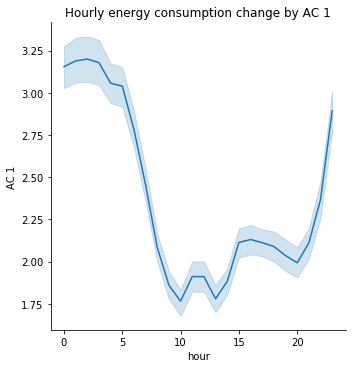

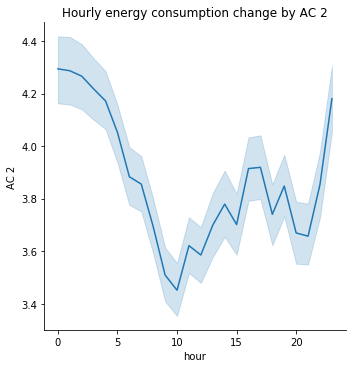

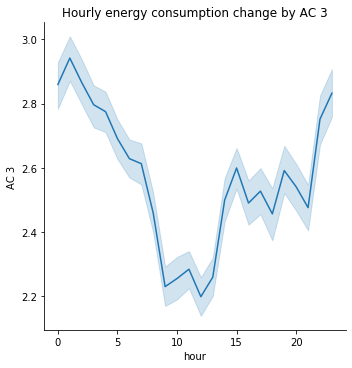

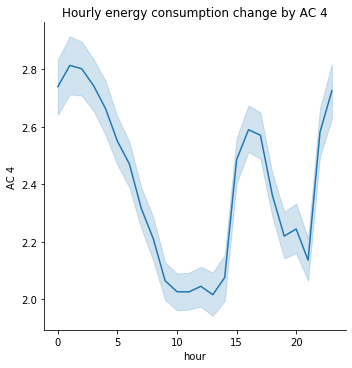

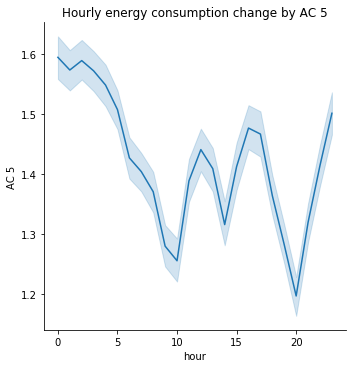

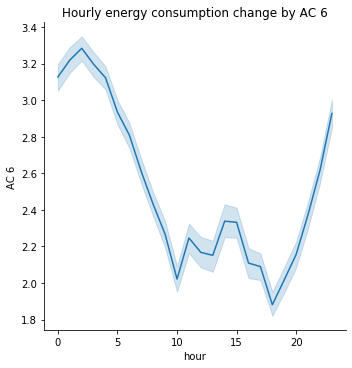

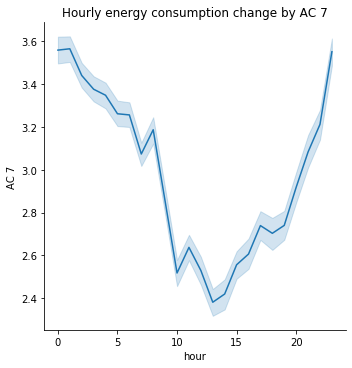

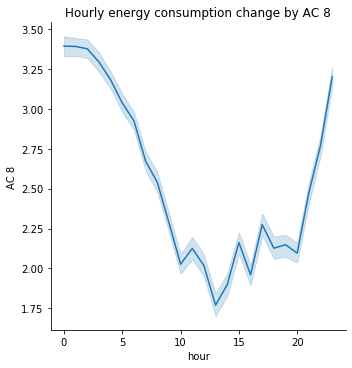

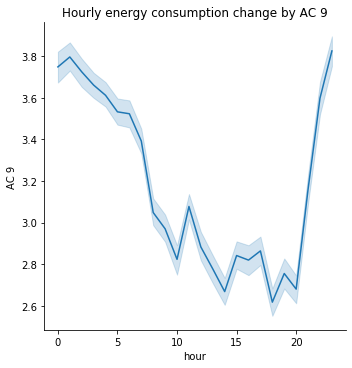

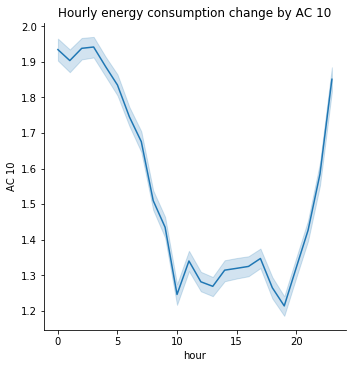

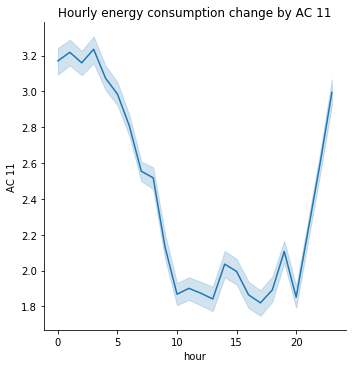

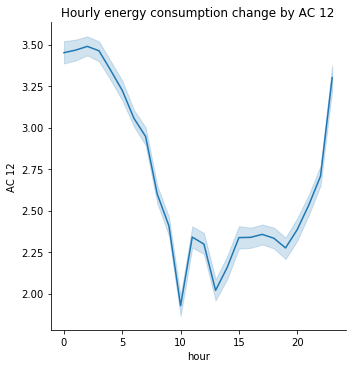

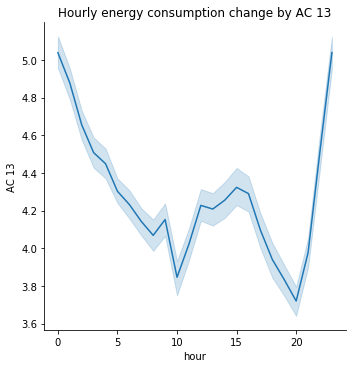

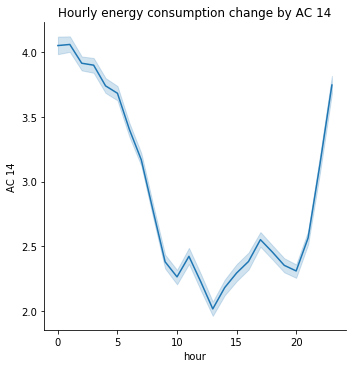

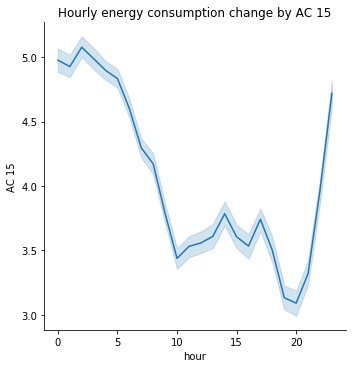

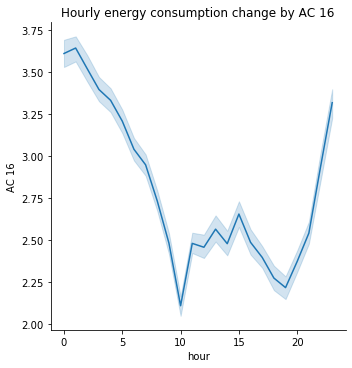

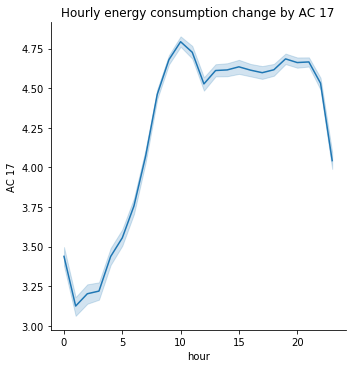

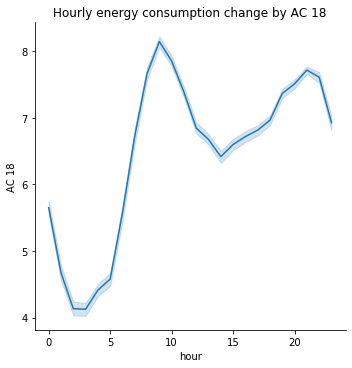

In [22]:
for i in ac_list:
    sns.relplot(x = 'hour', y = i , data = df, kind= 'line', sort = True )
    plt.title(f'Hourly energy consumption change by {i}')

By above analysis we can say that:
   * Power consumed by all the AC rather than AC_17 and AC_18 is high at the Night in time approximate  range bwtween (19(pm) to 7am)
   * If we analyze the graph of AC_1 to AC_16 there is a sudden down in power cosupmption grpah nearly 10 AM to 12 PM, so we can create a perception (Hypotheses) that may be the Hotel check-out timing.
   * along with that the minimum of power consumption by all the AC's rather than AC_17 and AC_18 is also in time between (10 am to 17 pm), so that may be the time the guest check_in,(Hypothesis ).
   * instead of all if we took a look at the power consumption of AC_17 and AC_18, these two are working more in the daytime and consume more power in the day, and less in the Night.

###### Now we the the total power consumed in a hour by all air conditioners for which add all the powers consumed by each AC

In [23]:
# Total Power consumed per day by all AC
df['Total_Power'] = df[ac_list].sum(axis = 1)
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,...,AC 18,date_time,year,month,week_day,day,week_of_year,hour,minute,Total_Power
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,...,6.735981,2019-08-01 00:00:00,2019,8,3,1,31,0,0,65.393197
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2019-08-01 00:01:00,2019,8,3,1,31,0,1,0.000000
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,...,6.379500,2019-08-01 00:02:00,2019,8,3,1,31,0,2,64.762056
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2019-08-01 00:03:00,2019,8,3,1,31,0,3,0.000000
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,...,6.363475,2019-08-01 00:04:00,2019,8,3,1,31,0,4,65.791277


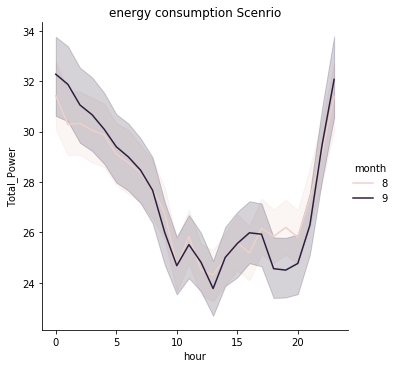

In [24]:
#visualize power consumption by all AC on hourly basis
sns.relplot(x = 'hour', y = 'Total_Power', data = df,kind= 'line',hue='month', sort = True )
plt.title('energy consumption Scenrio')
plt.show()

Text(0.5, 1.0, 'Overall Power Cosumption at each Hour')

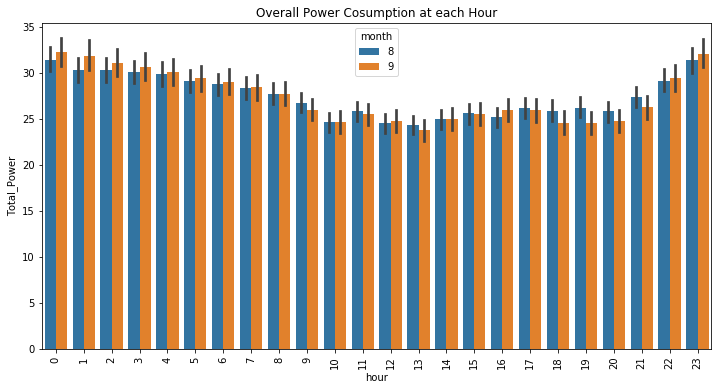

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x=df['hour'], y=df['Total_Power'], hue='month', data=df)
plt.title('Overall Power Cosumption at each Hour')

if we also look the above plot, there is come to know that the overall power consumed by all the Air conditioners is high at the night time as compared to the day

###### find min and max power consumed by AC

In [26]:
# to find the total power consumed and sorting values
df[(ac_list)].sum().sort_values()

AC 5      62151.007653
AC 10     67210.227984
AC 1     103997.423000
AC 4     104678.005269
AC 11    105076.190097
AC 6     110085.431915
AC 8     111388.856216
AC 3     112272.957042
AC 12    118009.300995
AC 16    122390.195279
AC 14    127466.561772
AC 7     130202.009333
AC 9     139011.024092
AC 2     169113.147946
AC 15    176883.259424
AC 17    184428.462396
AC 13    187112.630994
AC 18    282567.569146
dtype: float64

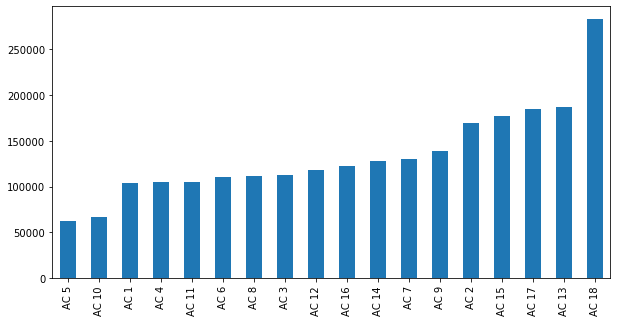

In [27]:
# Visualize power consumption per AC
df[(ac_list)].sum().sort_values().plot.bar(figsize=(10, 5))

plt.show()

###### From above analysis we had come to know that:
    Maximum power used by: AC_18 = 282567.56
    minimum power used by: AC_5 = 62151.00

<span style:color='Red' > for better understanding and more valuable inforamtion we can check the monthly and weekly power consumption per AC

In [28]:
# to find monthly power consumption per AC
monthly_cosumption=df.groupby("month")[ac_list].sum()
monthly_cosumption.T

month,8,9
AC 1,54059.042682,49938.380318
AC 2,91735.773281,77377.374666
AC 3,55250.974526,57021.982516
AC 4,54136.624427,50541.380842
AC 5,29964.796370,32186.211283
AC 6,50960.628044,59124.803871
AC 7,68405.475074,61796.534260
AC 8,54480.893590,56907.962626
AC 9,69396.137267,69614.886826
AC 10,35807.600713,31402.627272


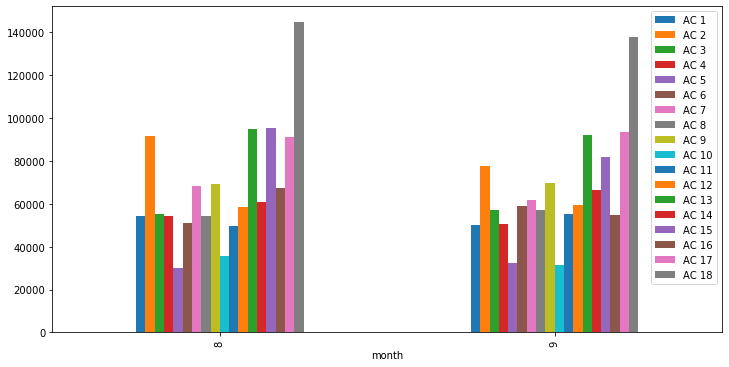

In [29]:
# to visualise the power consumption per AC in each month
monthly_cosumption.plot.bar(figsize=(12, 6))
plt.show()

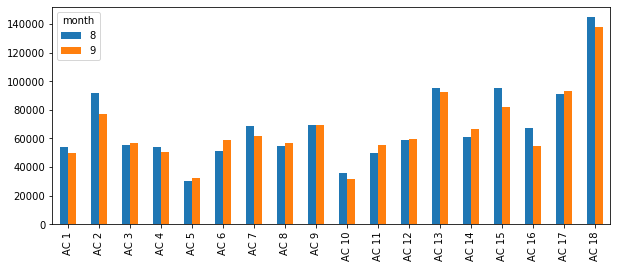

In [30]:
# to show case the which AC is used more in which month
monthly_cosumption.T.plot.bar(figsize=(10, 4))
plt.show()

if we saw on the scenario of both months August and September power consumed by air conditioner are:

* Augest Month:
        max Used: AC_18 = 144831.86
        min Used: AC_05 = 29964.796

* September month:
        max Used: AC_18 = 137735.70
        min Used: AC_10 = 31402.627

so, min values of consumption per AC got changed, but max usage remains the same which is for AC # 18

In [31]:
# to find weekly power consumption per AC
weekly_cosumption=df.groupby("week_of_year")[ac_list].sum()


In [32]:
weekly_cosumption.describe()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,10399.742300,16911.314795,11227.295704,10467.800527,6215.100765,11008.543192,13020.200933,11138.885622,13901.102409,6721.022798,10507.619010,11800.930100,18711.263099,12746.656177,17688.325942,12239.019528,18442.846240,28256.756915
std,5091.264599,8594.749109,4991.875098,5303.558141,2386.480795,5173.529706,5154.432423,4363.025164,5234.987798,2338.657629,4425.029900,4288.448432,6511.628252,4979.671296,6964.595842,4955.391176,6267.093235,9151.779522
min,1142.746920,2409.094486,1837.824576,1159.765872,690.821753,507.559907,1156.829079,1610.262631,2197.343172,883.845246,1244.156038,1699.395261,2148.220501,1734.622890,2136.590801,1369.969574,2508.379191,4022.343180
25%,7136.158040,12369.047727,8186.023629,7466.230734,5204.081124,8786.592843,11604.399910,10802.649615,13391.907134,6924.898410,9265.171498,10419.357858,17900.411836,12713.750663,14044.007152,10067.483343,19492.711521,29534.040656
50%,11413.993162,17421.190233,11095.481171,11096.640509,6983.628281,12187.374900,14667.872735,12474.767388,15863.215610,7508.052246,11384.468184,13353.109985,21334.135728,14073.366499,19246.489773,13650.211738,20436.613292,31474.392789
75%,13770.384290,23569.077629,14011.263073,12770.410689,7860.496643,14168.604707,16212.906762,13944.647549,17437.883478,7677.368975,13130.470487,14815.449237,22100.656485,14737.572900,23205.642052,15428.381325,22070.445304,32187.496441
max,17245.728955,28464.506148,18307.969906,18630.378802,8479.894344,17044.844453,18195.116630,15130.553918,18246.722001,9383.515677,16656.661424,15280.998316,23741.412354,18476.026428,23852.598848,17146.946459,22737.375696,35258.051456


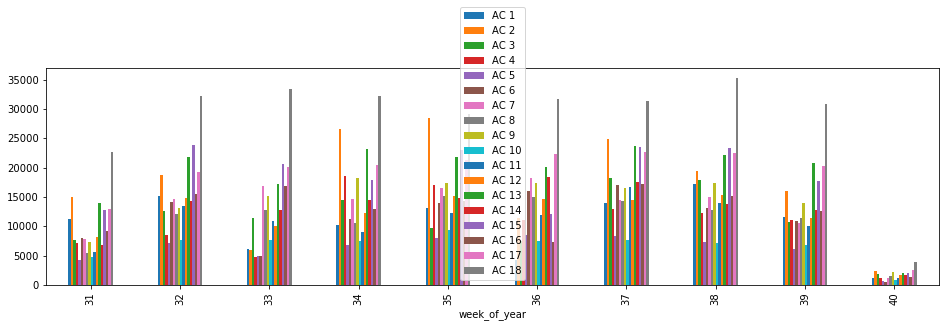

In [33]:
# to visualise the power consumption per AC in each week
weekly_cosumption.plot.bar(figsize=(16, 4))
plt.show()

From above analysis of weekly based power consumption we had also come to know that:
   * maximum power consumption per ac is for AC_18 for every week 
   *  maximum power consumption per ac is changed  for every week 

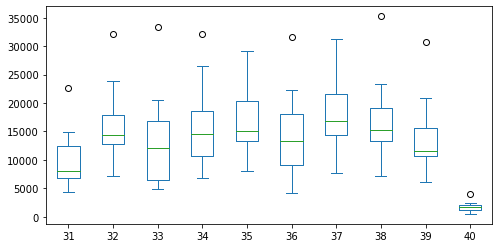

In [34]:

Weekly_change=weekly_cosumption.transpose()
Weekly_change.plot.box(figsize=(8, 4))
plt.show()

by visualise the weekly power consumption for all AC in each week we had come to know that there are three weeks in which air conditioners are used very less

###### in all the scenrio  the most power is consumed by the AC_18 


______________________________________________________________________________________________________________________________________________

_____________________________________________________________________________________________________________________________________________________________

#### Corelation Power Data with the outside Temperature of Gurgaon.
The given data is for two months: August and September, So it's for a total of 61 days (1464 Hours). now we correlate this data with Gurgaon weather data to find the patterns between.
   * so first we compute the total power consumed by all the air conditioners within one hour  
   * then we correlate with Gurugram weather data

In [35]:

print(f"given data is of {24*61} Hours") 

given data is of 1464 Hours


In [36]:
# comute power consumed by all Air Conditioners within one Hour
N = 60*24
PowerPerday=df.groupby(df.index // N)["Total_Power"].sum()

In [37]:
# creat a serise of data from date 8/1/2019' to '9/30/2019'
date=pd.Series(pd.date_range(start='8/1/2019', end='9/30/2019', freq="D"))

In [38]:
# Create a dataframe of per day total power consumtion 
PowerPerday=pd.DataFrame(PowerPerday)

In [39]:
#df1=pd.read_csv('Gurugram_Weather_data.csv')

In [42]:
# Import the weather data of Gurugram city
url = "https://drive.google.com/file/d/1_0oqZliV3tnehdv0ivFkDKiqfqxR8syg/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df1 = pd.read_csv(path)


In [43]:
df1.tail()

,Unnamed: 0,date_time,tempC,windspeedKmph,humidity,precipMM,pressure
1459,1459,30-09-2019 19:00,28,11,67,0.1,1007
1460,1460,30-09-2019 20:00,28,11,69,0.8,1007
1461,1461,30-09-2019 21:00,27,11,70,1.1,1007
1462,1462,30-09-2019 22:00,27,10,71,0.5,1007
1463,1463,30-09-2019 23:00,26,10,73,0.4,1008


In [44]:
# fetch out the Tempurature Data from weather Data
N = 24
TempPerday=df1.groupby(df1.index // N)["tempC"].median()

In [45]:
# create a dataframe of Temprature data
TempPerday=pd.DataFrame(TempPerday)

In [46]:
# concat all the three created dataframe and create a new one
data=pd.concat((date,TempPerday,PowerPerday),axis=1)

In [47]:
data.head()

,0,tempC,Total_Power
0,2019-08-01,34.0,45637.956034
1,2019-08-02,34.0,42881.051829
2,2019-08-03,35.0,40699.534163
3,2019-08-04,35.0,41914.534247
4,2019-08-05,34.5,40032.420973


In [48]:
# Info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   0            61 non-null     datetime64[ns]
 1   tempC        61 non-null     float64       
 2   Total_Power  61 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.6 KB


In [49]:
# Extract month and and date from data
data['month'] = pd.DatetimeIndex(data[0]).month
data['day'] = pd.DatetimeIndex(data[0]).day

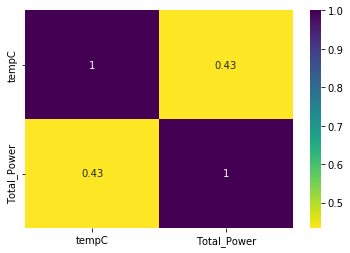

In [50]:
sns.heatmap(data[["tempC","Total_Power"]].corr(),annot=True,cmap="viridis_r")
plt.show()

#### here we can see that temp and total power consumed is approximate 43 % corelated to each other

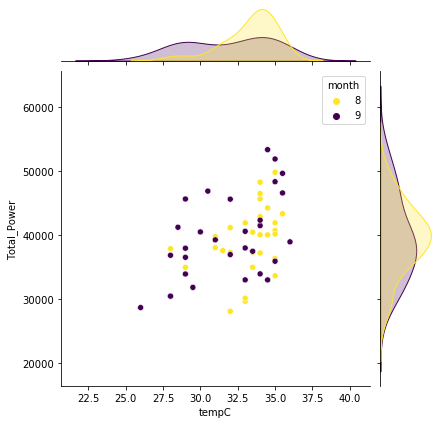

In [51]:
# create a joint plot to visualize the relationship b/w temp and power consumption
sns.jointplot(data=data, x="tempC", y="Total_Power",kind="scatter",hue="month",palette="viridis_r")
plt.show()

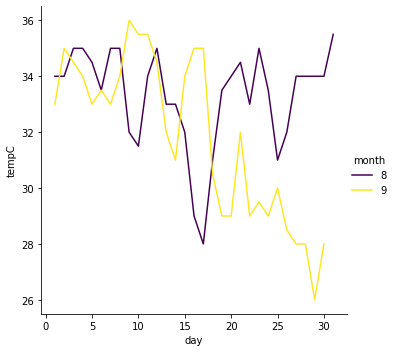

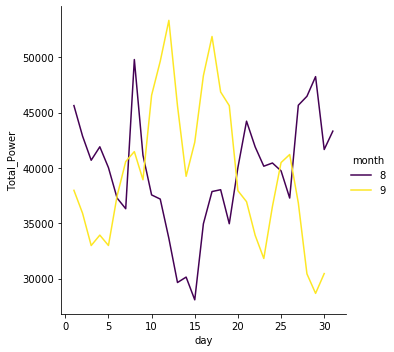

In [52]:
# to create a relational line plot
l=['tempC','Total_Power']
for i in l:
    sns.relplot(x = 'day', y = i, data = data,kind= 'line', hue="month", sort = True ,palette="viridis")
    plt.show()

By analysis from above plots of total power and temp we can clearly see that changing in temp the deflactions in power consumption is also noticed for both month varously. to analyze the more we need to go Deep.
* lets examine  how much chnages increases in Power consumption with changing in 1 unit of temp

###### Try to analyze the relation in temp and power consumption with simple linear  Equation

In [53]:
# create X and y
feature_cols = ["tempC"]
X = data[feature_cols]
y = data.Total_Power

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(f"intercept is: {lm.intercept_}")
print(f"coefficent is: {lm.coef_}")

intercept is: 6201.924489231074
coefficent is: [1024.26509017]


#### Interpreting the model
* we interpret the coefficient for tempC on Total_Power?


* "unit" increase in Temp is associated with a 1024.265 "unit" increase in Power Consumption.




#### Prediction using the model
If the temp is approximate 34 C, what will be the power consumption  for all the air condtioner per day?

*  linear equation is like : y = mx + C
                                * m = coeficent
                                * c = intercept
                        
                        
 According to equation: 
 * Power Consumption=  34 * 1024.26509017 + 6201.924489231074 = 41539.0701
 
 ##### so we can also say that when the temp of Gurugram is 34.5* C, the power consumed by all the Air conditioners of hotel might  be 41539.07010 unit

In [54]:
34.5 * 1024.26509017 + 6201.924489231074

41539.07010009607

In [55]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'tempC': [34.5]})
X_new.head()

,tempC
0,34.5


In [56]:
pred=lm.predict(X_new)
pred

array([41539.07010009])

so here our predicted value is 40931.3300, but in real our acctual value is same for temp near about 34.5* C, lets find it

In [57]:
acctual=data[data['tempC']==34.5]['Total_Power']
print(f"mean=  {acctual.mean()}")
acctual

mean=  42648.13841935633


4     40032.420973
20    44230.268304
33    32992.090481
42    53337.773919
Name: Total_Power, dtype: float64

Here we can see that acttual value is  changes day by day which is depending upon various condition of weather and guests, the mean of all the powers consumed is far away from the real one 

In [58]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'tempC': [data.tempC.min(), data.tempC.max()]})
X_new.head()

,tempC
0,26.0
1,36.0


In [59]:
preds = lm.predict(X_new)
preds

array([32832.81683364, 43075.46773534])

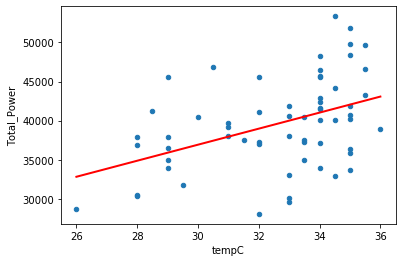

In [60]:
# first, plot the observed data
data.plot(kind='scatter', x='tempC', y='Total_Power')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

######  The Above Model which is Used to predict the Power Consumption with respect to temperature is used only to elaborate on "Hows the Power consumption might change as temperature changes". Here A simple purpose is to show the relations b/w the variables,  not to concentrate the accuracy of the model. 
###### To create a best model to predict the power consumptions w.r.t to temperature, we can use anther models like SVM, KNN, e.t.c.